## Data Simulation

In [2]:
import numpy as np

rng = np.random.default_rng(42)

In [3]:
n = 10000
ages = rng.integers(18, 91, n)

# Heights
heihts = rng.normal(loc=170, scale=7, size=n)
heihts = np.clip(heihts, 150, 200)
heights = np.round(heihts, 1)

# Weights
bmi_mean = 24.0
weights = bmi_mean * (heights / 100) ** 2 + rng.normal(0, 3.0, n)
weights = np.clip(weights, 45, 150)
weights = np.round(weights, 1)

# Income
incomes = rng.lognormal(mean=np.log(50000), sigma=0.9, size=n)
incomes = np.clip(incomes, 10000, 200000)
incomes = np.round(incomes, 2)

In [4]:
dtype = [('Age', 'i4'), ('Height_cm', 'f4'), ('Weight_kg', 'f4'), ('Income', 'f8')]
data  = np.empty(n, dtype=dtype)

data['Age'] = ages
data['Height_cm'] = heights
data['Weight_kg'] = weights
data['Income'] = incomes

print(data[:100])

[(24, 162.3, 60.4,  31263.85) (74, 166.2, 66.1,  50749.03)
 (65, 171.9, 69.8,  91443.  ) (50, 165.6, 68.3, 106980.41)
 (49, 168.1, 70.4,  66586.8 ) (80, 173.1, 66.4,  18906.83)
 (24, 167.6, 70.6,  10000.  ) (68, 171.6, 68.8,  42218.67)
 (32, 181.1, 79.4, 119842.62) (24, 168.8, 65.6,  74944.71)
 (56, 178.3, 77.4,  62168.77) (89, 173.9, 80.2,  49684.8 )
 (71, 159.7, 61.6,  66036.97) (73, 162.3, 61.8,  20436.88)
 (70, 164.2, 64. , 100907.54) (75, 164. , 60.1, 107093.13)
 (55, 169.4, 73.2,  36316.93) (27, 174.3, 73.9,  74093.65)
 (79, 178.8, 73.6,  10666.72) (50, 172.2, 68.1,  58795.55)
 (54, 166.9, 66.9,  44354.33) (45, 155.4, 60.8, 155295.95)
 (31, 170.5, 66.3,  41814.56) (85, 170.2, 72.9, 109269.91)
 (75, 171.3, 70.1,  35162.06) (65, 184.7, 79.1,  10000.  )
 (47, 178.7, 75.2,  40814.62) (78, 175.5, 79.2,  59686.42)
 (57, 163.3, 59.8,  57269.99) (50, 166.4, 64.3,  58054.28)
 (50, 169.3, 71.6,  31696.75) (34, 164.6, 65.7,  37362.52)
 (24, 173.5, 69.9,  18143.52) (58, 172.5, 74.3,  10000. 

In [5]:
rows = np.column_stack((ages, heights, weights, incomes))
np.savetxt('dataSimlulation.csv',rows, delimiter=',', 
           header='Age,Height_cm,Weight_kg,Income', 
           comments='', fmt=['%d', '%.1f', '%.1f', '%.2f'])

## Basic Statistics

In [6]:
ages = data['Age']
heights = data['Height_cm']
weights = data['Weight_kg']
incomes = data['Income']

In [7]:
# Mean
print("Mean Age:", np.mean(ages))
print("Mean Height:", np.mean(heights))
print("Mean Weight:", np.mean(weights))
print("Mean Income:", np.mean(incomes))

print("-" * 30)

# Median
print("Median Age:", np.median(ages))
print("Median Height:", np.median(heights))
print("Median Weight:", np.median(weights))
print("Median Income:", np.median(incomes))

print("-" * 30)

# Standard Deviation
print("Height Variance:", np.var(heights))
print("Height Standard Deviation:", np.std(heights))

Mean Age: 53.7376
Mean Height: 169.9806
Mean Weight: 69.565796
Mean Income: 68214.606163
------------------------------
Median Age: 54.0
Median Height: 169.9
Median Weight: 69.5
Median Income: 50163.455
------------------------------
Height Variance: 49.34279
Height Standard Deviation: 7.024442


In [8]:
corr_mtx = np.corrcoef(heights, weights)
print("Correlation matrix (Height vs Weight):\n", corr_mtx)
print("Correlation coefficient (Height vs Weight):", corr_mtx[0, 1])

Correlation matrix (Height vs Weight):
 [[1.        0.8847048]
 [0.8847048 1.       ]]
Correlation coefficient (Height vs Weight): 0.8847047953910524


In [9]:
# Top 10 richest peoples

top10_idx = np.argsort(incomes)[-10:]
print("Top 10 Incomes:\n", incomes[top10_idx])

# Corresponding ages, heights, weights
print("Corresponding Ages:", ages[top10_idx])
print("Corresponding Heights:", heights[top10_idx])
print("Corresponding Weights:", weights[top10_idx])


Top 10 Incomes:
 [200000. 200000. 200000. 200000. 200000. 200000. 200000. 200000. 200000.
 200000.]
Corresponding Ages: [71 73 19 59 36 49 28 73 43 59]
Corresponding Heights: [159.2 156.6 184.3 173.  161.2 160.1 158.9 161.2 173.4 178.6]
Corresponding Weights: [62.1 56.7 82.5 72.  64.  64.7 57.2 65.9 71.  81.9]


In [10]:
summary = np.column_stack((ages, heights, weights, incomes))

means = np.mean(summary, axis=0)
medians = np.median(summary, axis=0)
min = np.min(summary, axis=0)
max = np.max(summary, axis=0)

print("Means      :", means)
print("Medians    :", medians)
print("Min values :", min)
print("Max values :", max)

Means      : [5.37376000e+01 1.69980610e+02 6.95657900e+01 6.82146062e+04]
Medians    : [   54.          169.8999939    69.5       50163.455    ]
Min values : [   18.   150.    45. 10000.]
Max values : [9.00000000e+01 1.99100006e+02 9.60000000e+01 2.00000000e+05]


## Data Manipulation

In [11]:
# Min-Max Normalization

def minmax_scale(arr):
    return (arr - arr.min()) / (arr.max() - arr.min())

heights_norm = minmax_scale(heights)
weights_norm = minmax_scale(weights)

print("First 10 normalized heights:\n", heights_norm[:10])
print('-' * 50)
print("First 10 normalized weights:\n", weights_norm[:10])

First 10 normalized heights:
 [0.2505092  0.3299388  0.44602832 0.317719   0.3686355  0.4704685
 0.35845223 0.4399186  0.6334013  0.38289207]
--------------------------------------------------
First 10 normalized weights:
 [0.30196083 0.41372547 0.48627457 0.4568628  0.49803925 0.41960788
 0.50196075 0.46666673 0.6745098  0.40392154]


In [12]:
# Compute BMI (Body Mass Index)

bmi = weights / ((heights / 100.0)**2)
print("First 10 BMI Values:\n", bmi[:10])

First 10 BMI Values:
 [22.929781 23.929821 23.621296 24.905775 24.913641 22.160212 25.13371
 23.364357 24.209373 23.02284 ]


In [13]:
# Categorize BMI into groups

bmi_category = np.empty(bmi.shape, dtype=object)

bmi_category = np.where(bmi<18.5, "Underweight", bmi_category)
bmi_category = np.where((bmi>=18.5) & (bmi<25), "Normal", bmi_category)
bmi_category = np.where((bmi>=25) & (bmi<30), "Overweight", bmi_category)
bmi_category = np.where(bmi>=30, "Obese", bmi_category)

print("First 10 BMI Categories : \n", bmi_category[:50])

First 10 BMI Categories : 
 ['Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Overweight'
 'Normal' 'Normal' 'Normal' 'Normal' 'Overweight' 'Normal' 'Normal'
 'Normal' 'Normal' 'Overweight' 'Normal' 'Normal' 'Normal' 'Normal'
 'Overweight' 'Normal' 'Overweight' 'Normal' 'Normal' 'Normal'
 'Overweight' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Overweight' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal' 'Overweight'
 'Overweight' 'Normal' 'Normal' 'Overweight' 'Overweight' 'Overweight'
 'Normal' 'Normal' 'Normal']


In [14]:
# Count how many people in each BMI group

from enum import unique


unique, counts = np.unique(bmi_category, return_counts=True)
bmi_distribution = dict(zip(unique, counts))
print("BMI Group Distribution:\n", bmi_distribution)

BMI Group Distribution:
 {'Normal': np.int64(8213), 'Overweight': np.int64(1787)}


In [15]:
# Attach new columns to the dataset

dtype2 = [('age', 'i4'), ('height_cm', 'f4'), ('weight_kg', 'f4'),
          ('income', 'f8'), ('bmi', 'f4'), ('bmi_category', 'U12')]

data2 = np.empty(n, dtype=dtype2)

data2['age'] = ages
data2['height_cm'] = heights
data2['weight_kg'] = weights
data2['income'] = incomes
data2['bmi'] = bmi
data2['bmi_category'] = bmi_category

print(data2)

[(24, 162.3, 60.4, 31263.85, 22.929781, 'Normal')
 (74, 166.2, 66.1, 50749.03, 23.929821, 'Normal')
 (65, 171.9, 69.8, 91443.  , 23.621296, 'Normal') ...
 (43, 164.7, 68.2, 26994.41, 25.141848, 'Overweight')
 (59, 166.6, 64.5, 40104.88, 23.238586, 'Normal')
 (62, 175.1, 76.4, 30146.17, 24.918451, 'Normal')]


In [16]:
rows_extended = np.column_stack((ages, heights, weights, incomes, bmi))
rows_with_cat = np.column_stack((ages, heights, weights, incomes, bmi, bmi_category))

np.savetxt(
    "dataSimulation_extended.csv",
    rows_with_cat,
    delimiter=",",
    fmt=["%d", "%.1f", "%.1f", "%.2f", "%.2f", "%s"],
    header="age,height_cm,weight_kg,income,bmi,bmi_category",
    comments=""
)

## Linear Algebra with NumPy

In [17]:
A = rng.integers(1, 11, size=(3, 3))
print("Matrix :\n", A)

Matrix :
 [[ 1  1  4]
 [ 5  2  6]
 [10  7 10]]


In [18]:
det_A = np.linalg.det(A)
print("Determinant of A:\n", det_A)

Determinant of A:
 48.00000000000003


In [19]:
if not np.isclose(det_A, 0):
    A_inv = np.linalg.inv(A)
    print("Inverse of A:\n", A_inv)
else:
    print("Not invertible")

Inverse of A:
 [[-0.45833333  0.375      -0.04166667]
 [ 0.20833333 -0.625       0.29166667]
 [ 0.3125      0.0625     -0.0625    ]]


In [21]:
# Eigenvalues & Eigenvectors

eigavals, eigvecs = np.linalg.eig(A)
print("Eigenvalues:\n", eigavals)
print("-" * 30)
print("Eigenvectors:\n", eigvecs)

Eigenvalues:
 [16.50788199 -2.16455895 -1.34332304]
------------------------------
Eigenvectors:
 [[-0.25062502 -0.79108628  0.74601841]
 [-0.44247703  0.07516165 -0.60100635]
 [-0.86104656  0.60706938 -0.28678895]]


In [22]:
# Solve a system of linear equations
# System : 2x + y = 5 & x + 3y = 10

B = np.array([[2,1],
             [1,3]])

b = np.array([5, 10])

x = np.linalg.solve(B, b)
print("Solution (x, y):\n", x)

Solution (x, y):
 [1. 3.]


In [24]:
# Matrix multiplication (dot product)

C = rng.integers(1, 5, size=(3,3))
print("Matrix C:\n", C)

print('-'*30)

AC = np.dot(A, C)
print("Dot Product A.C:\n", AC)

Matrix C:
 [[1 3 2]
 [4 2 3]
 [3 3 4]]
------------------------------
Dot Product A.C:
 [[17 17 21]
 [31 37 40]
 [68 74 81]]


## Time Series Simulation

In [27]:
days = 365
start_price = 100

daily_return = rng.normal(0,1, days)
print("Daily Return:\n", daily_return[:10])

Daily Return:
 [-0.79092169  1.34970561 -1.10667288  0.43919773 -0.48584068  1.08234604
  0.88374084 -0.00204981  1.55472039 -0.18739922]


In [28]:
# Compute stock prices

price_change = np.cumsum(daily_return)
prices = start_price + price_change

print("First 10 Stock Prices:\n", prices[:10])

First 10 Stock Prices:
 [ 99.20907831 100.55878392  99.45211104  99.89130877  99.40546809
 100.48781413 101.37155498 101.36950516 102.92422556 102.73682634]


In [29]:
# Percentage growth

daily_pct = rng.normal(0, 0.02, days)
prices2 = start_price * np.cumprod(1 + daily_pct)
print("First 10 Stock Prices (Percentage Growth):\n", prices2[:10])

First 10 Stock Prices (Percentage Growth):
 [98.38155112 97.01103427 98.15349456 95.53943208 95.83580678 94.23942406
 91.87755623 89.87156687 89.82880319 91.20098282]


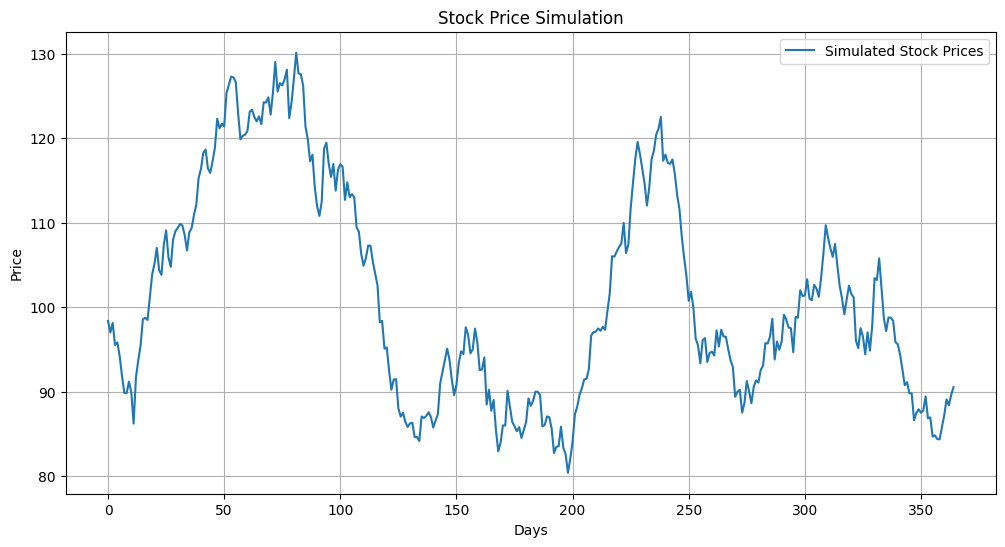

In [30]:
# Plot the results

from cProfile import label
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(prices2,label="Simulated Stock Prices")
plt.xlabel("Days")
plt.ylabel("Price")
plt.title("Stock Price Simulation")
plt.legend()
plt.grid(True)
plt.show()